In [49]:
import numpy  as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix




In [31]:
df = pd.read_csv('C:/Users/Olga/Downloads/archive/happydata.csv')

In [32]:
scaler = MinMaxScaler()
print(df)

     infoavail  housecost  schoolquality  policetrust  streetquality  ëvents  \
0            3          3              3            4              2       4   
1            3          2              3            5              4       3   
2            5          3              3            3              3       5   
3            5          4              3            3              3       5   
4            5          4              3            3              3       5   
..         ...        ...            ...          ...            ...     ...   
138          5          3              3            1              3       5   
139          5          2              3            4              2       5   
140          5          3              3            4              4       5   
141          4          3              3            4              4       5   
142          5          3              2            5              5       5   

     happy  
0        0  
1        0  


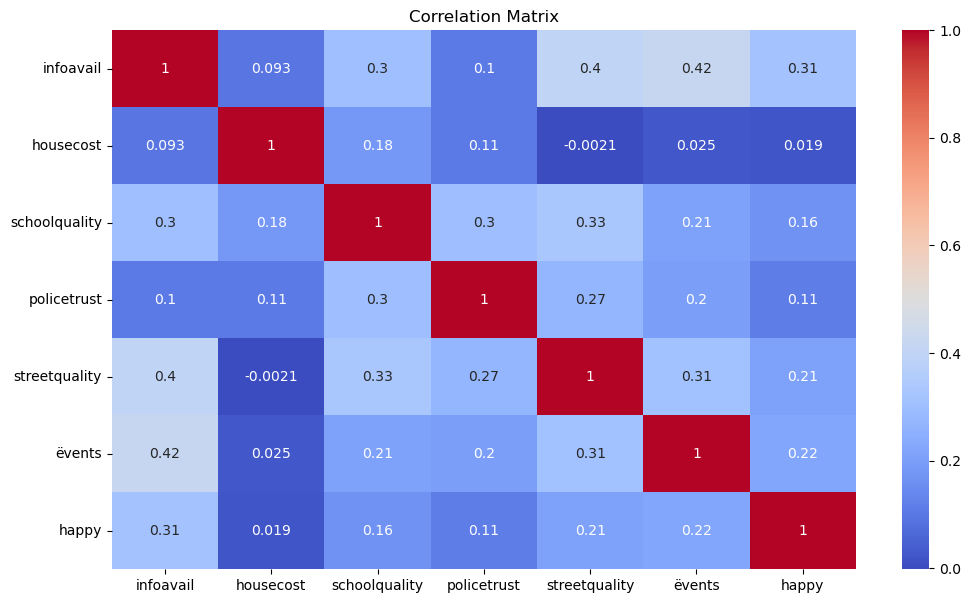

In [33]:
df.head(10)
df.fillna(df.mean(), inplace=True)

correlation_matrix = df.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


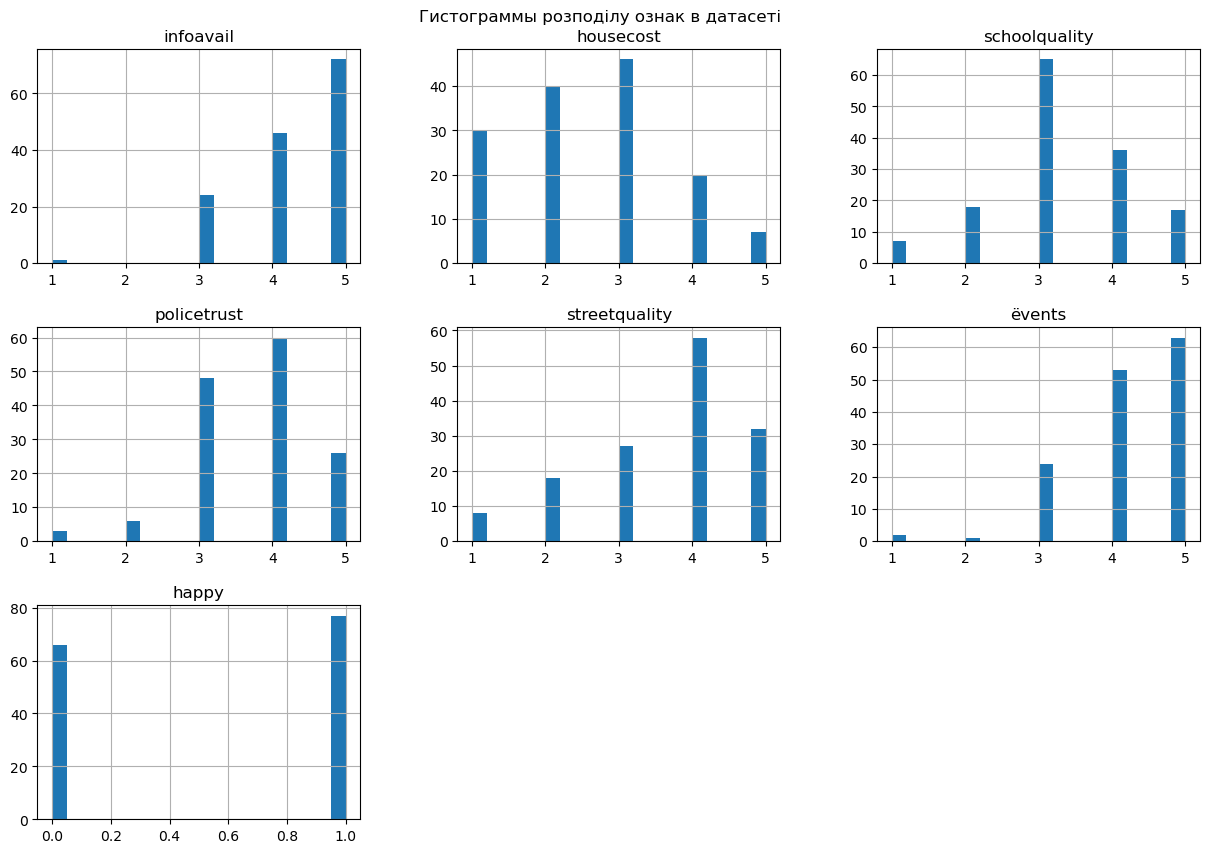

In [34]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Гистограммы розподілу ознак в датасеті', y=0.92)
plt.show()

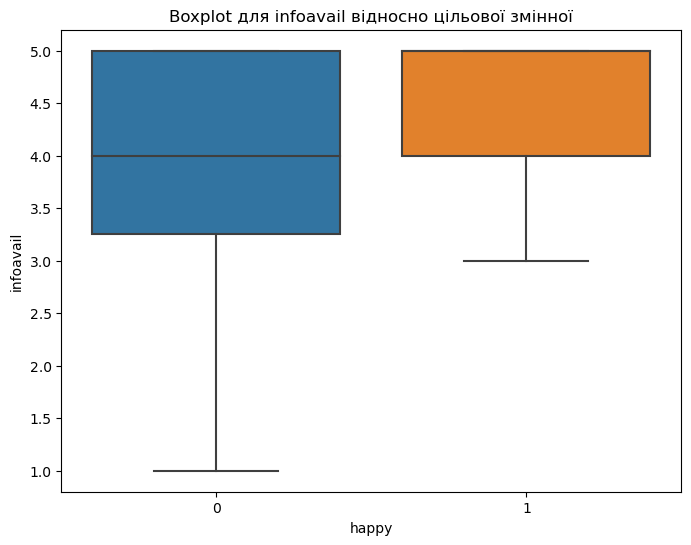

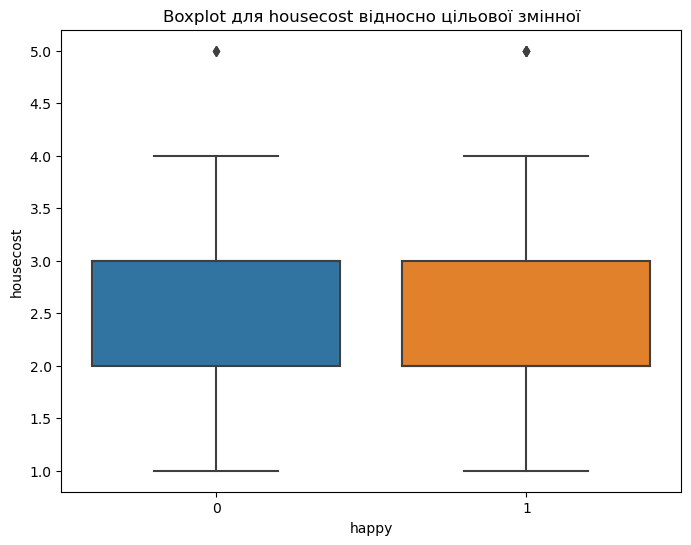

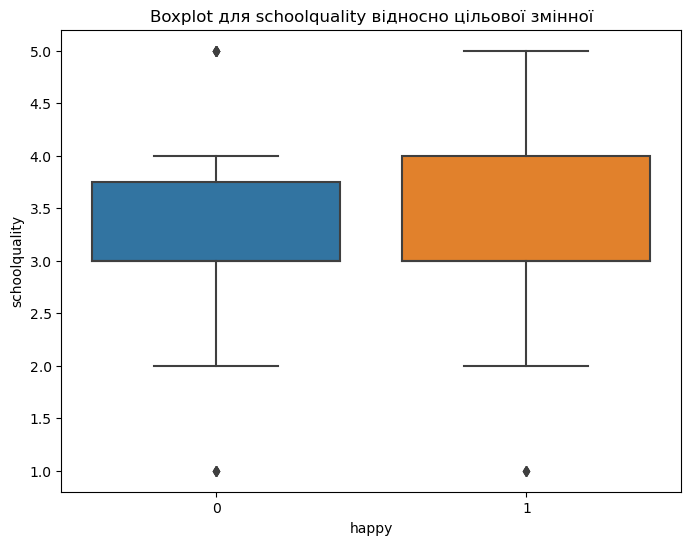

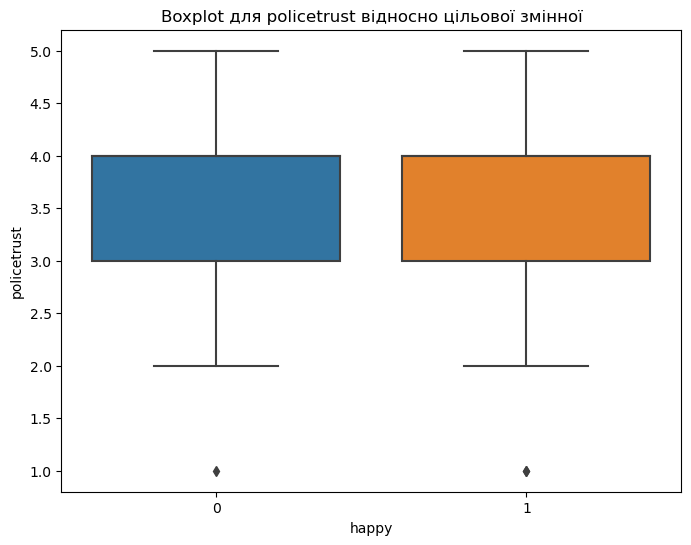

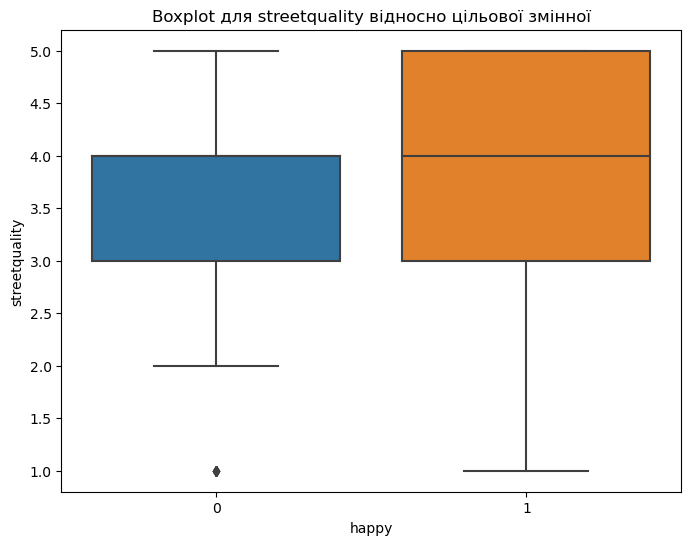

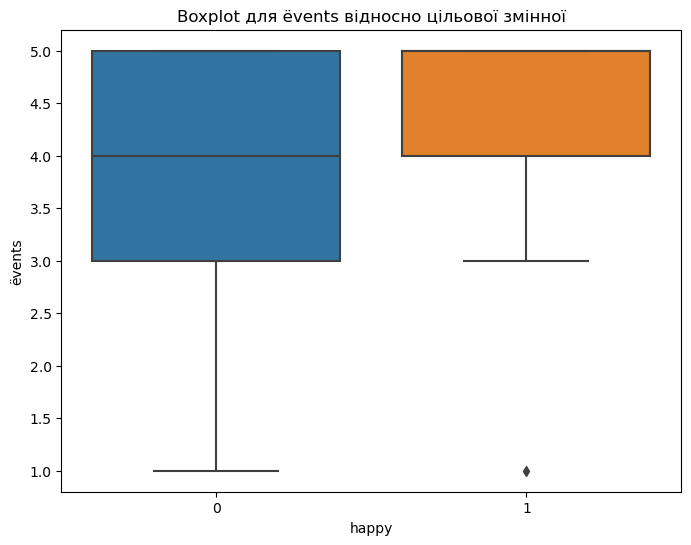

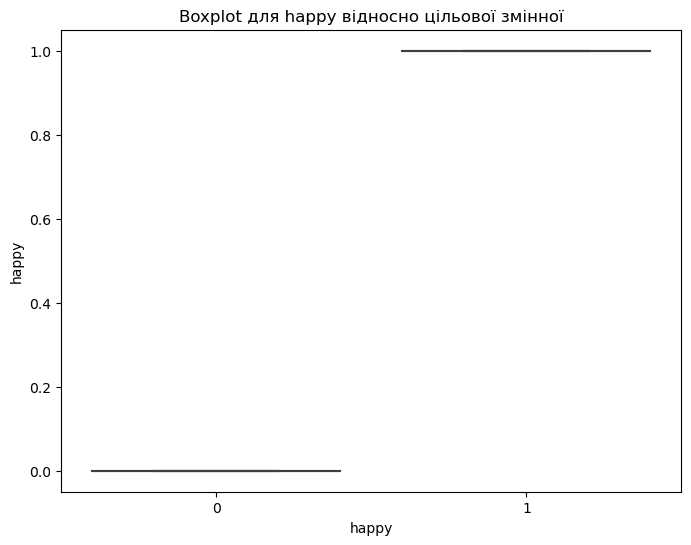

In [35]:
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='happy', y=col, data=df)
    plt.title(f'Boxplot для {col} відносно цільової змінної')
    plt.show()

In [36]:
df_normalized = scaler.fit_transform(df)

print(df_normalized)

[[0.5  0.5  0.5  ... 0.25 0.75 0.  ]
 [0.5  0.25 0.5  ... 0.75 0.5  0.  ]
 [1.   0.5  0.5  ... 0.5  1.   1.  ]
 ...
 [1.   0.5  0.5  ... 0.75 1.   1.  ]
 [0.75 0.5  0.5  ... 0.75 1.   0.  ]
 [1.   0.5  0.25 ... 1.   1.   0.  ]]


In [41]:
X = df.drop('happy', axis=1).copy()
y = df['happy'].copy()


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Створити класифікатор kNN
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Навчити модель
knn_classifier.fit(X_train, y_train)

# Оцінка точності на тестовому наборі
accuracy_knn = knn_classifier.score(X_test, y_test)

In [44]:
# Створити класифікатор дерева рішень
tree_classifier = DecisionTreeClassifier()

# Навчити модель
tree_classifier.fit(X_train, y_train)

# Оцінка точності на тестовому наборі
accuracy_tree = tree_classifier.score(X_test, y_test)

In [45]:
# Створити класифікатор SVM
svm_classifier = SVC()

# Навчити модель
svm_classifier.fit(X_train, y_train)

# Оцінка точності на тестовому наборі
accuracy_svm = svm_classifier.score(X_test, y_test)

In [46]:
# Створити класифікатор випадкового лісу
rf_classifier = RandomForestClassifier()

# Навчити модель
rf_classifier.fit(X_train, y_train)

# Оцінка точності на тестовому наборі
accuracy_rf = rf_classifier.score(X_test, y_test)

In [47]:
# Створити класифікатор AdaBoost
adaboost_classifier = AdaBoostClassifier()

# Навчити модель
adaboost_classifier.fit(X_train, y_train)

# Оцінка точності на тестовому наборі
accuracy_adaboost = adaboost_classifier.score(X_test, y_test)

In [50]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}

# Створіть класифікатор kNN
knn_classifier = KNeighborsClassifier()

# Використовуйте GridSearchCV для пошуку оптимальних параметрів
grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)

# Отримайте найкращі параметри
best_params_knn = grid_search_knn.best_params_
print(f"Найкращі параметри для kNN: {best_params_knn}")

# Отримайте найкращу модель
best_model_knn = grid_search_knn.best_estimator_

# Оцініть точність на тестовому наборі
accuracy_knn = best_model_knn.score(X_test, y_test)
print(f"Точність на тестовому наборі для kNN: {accuracy_knn}")

Найкращі параметри для kNN: {'n_neighbors': 9}
Точність на тестовому наборі для kNN: 0.5862068965517241


In [51]:
param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10]}

# Створіть класифікатор SVM
svm_classifier = SVC()

# Використовуйте GridSearchCV для пошуку оптимальних параметрів
grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Отримайте найкращі параметри
best_params_svm = grid_search_svm.best_params_
print(f"Найкращі параметри для SVM: {best_params_svm}")

# Отримайте найкращу модель
best_model_svm = grid_search_svm.best_estimator_

# Оцініть точність на тестовому наборі
accuracy_svm = best_model_svm.score(X_test, y_test)
print(f"Точність на тестовому наборі для SVM: {accuracy_svm}")

Найкращі параметри для SVM: {'C': 1, 'gamma': 0.01}
Точність на тестовому наборі для SVM: 0.5172413793103449


In [53]:
y_pred_knn = best_model_knn.predict(X_test)
y_pred_svm = best_model_svm.predict(X_test)

In [54]:
print("Classification Report для kNN:")
print(classification_report(y_test, y_pred_knn))

print("Confusion Matrix для kNN:")
print(confusion_matrix(y_test, y_pred_knn))

print("Classification Report для SVM:")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix для SVM:")
print(confusion_matrix(y_test, y_pred_svm))

Classification Report для kNN:
              precision    recall  f1-score   support

           0       0.67      0.40      0.50        15
           1       0.55      0.79      0.65        14

    accuracy                           0.59        29
   macro avg       0.61      0.59      0.57        29
weighted avg       0.61      0.59      0.57        29

Confusion Matrix для kNN:
[[ 6  9]
 [ 3 11]]
Classification Report для SVM:
              precision    recall  f1-score   support

           0       0.67      0.13      0.22        15
           1       0.50      0.93      0.65        14

    accuracy                           0.52        29
   macro avg       0.58      0.53      0.44        29
weighted avg       0.59      0.52      0.43        29

Confusion Matrix для SVM:
[[ 2 13]
 [ 1 13]]
